<h1><font color="#113D68" size=6>Deep Learning con Python y Keras</font></h1>

<h1><font color="#113D68" size=5>Multilayer Perceptron</font></h1>

<h1><font color="#113D68" size=4>Desarrollar una red neuronal</font></h1>



---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Conjunto de datos](#section1)
* [2. Cargar datos](#section2)
* [3. Definir modelo](#section3)
* [4. Compilar modelo](#section4)
* [5. Ajustar modelo](#section5)
* [6. Evaluar modelo](#section6)
* [7. Hacer predicciones](#section7)


---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

Diseñaremos nuestra primera red neuronal.

* Cómo cargar un conjunto de datos?
* Cómo diseñar y compilar un modelo de perceptrón multicapa en Kera?
* Cómo evaluar un modelo de Keras?

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Conjunto de datos</font>

En este tutorial vamos a utilizar el conjunto de datos Pima Indians Diabetes. Describe los datos de los registros médicos de los pacientes y si tuvieron una aparición de diabetes dentro de los cinco años. Es un problema de clasificación binaria (aparición de diabetes como 1 o 0 si no aparece). Las variables de entrada que describen a cada paciente son numéricas y tienen escalas variables.

Dado que todos los atributos son numéricos, es fácil de usar directamente con redes neuronales que esperan entradas y valores de salida numéricos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede descargar el Dataset desde [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

La precisión de la línea de base si se hacen todas las predicciones ya que no aparece la diabetes es del 65,1%. Los mejores resultados en el conjunto de datos están en el rango de 77,7% de precisión utilizando una validación cruzada de 10 veces.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Cargar datos</font>

Vamos a cargar el archivo directamente usando la función `loadtxt()` de NumPy y establecer dividir las características y target.

In [19]:
import numpy as np

dataset = np.loadtxt('Datasets/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:, 0:8]
y = dataset[:, 8]

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Definir modelo</font>

# Los modelos en Keras se definen como una secuencia de capas. Creamos un modelo **Secuencial** y agregamos capas de una en una hasta que estemos satisfechos con nuestra topología de red. 

Lo primero que debe hacer bien es asegurarse de que la capa de entrada tenga el número correcto de entradas. Esto se puede especificar al crear la primera capa con el argumento `input_dim` y establecerlo en 8. 

Pregunta, ¿Cómo sabemos la cantidad de capas que debemos usar y sus tipos? 


En sí el procedimiento a utilizar será:
1. Las capas completamente conectadas se definen mediante la clase `Dense`. Se puede especificar:
    * El número de neuronas en la capa como primer argumento y 
    * Especificar la función de activación usando el parámetro `activation`.
2. Usaremos la función de activación ReLu en las dos primeras capas y la función de activación Sigmoidea en la capa de salida. 
3. Usamos una función de activación sigmoidea en la capa de salida para garantizar que la salida de nuestra red esté entre 0 y 1. 

La siguiente figura proporciona una descripción de la estructura de la red.


<img src="images/2_redNeuronal.png" width="200" height="200" />

In [20]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
from keras.models import Sequential
from keras.layers import Dense

# define the Keras model
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. Compilar modelo</font>

Ahora que el modelo está definido, podemos compilarlo. 

Al compilar, debemos especificar algunas propiedades adicionales requeridas al entrenar la red. 

Debemos especificar:
1. La función de pérdida que se utilizará para evaluar un conjunto de ponderaciones, 
2. El optimizador utilizado para buscar entre diferentes ponderaciones para la red y
3. Cualquier métrica opcional que nos gustaría recopilar e informar durante el entrenamiento. 
    * En este caso usaremos la **pérdida logarítmica**, que para un problema de clasificación binaria se define como `binary_crossentropy`. 
4. También usaremos el algoritmo de Gradiente Descendiente `adam` 
5. Finalmente, debido a que es un problema de clasificación nuestra métrica será el Accuracy.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Obtenga más información sobre el algoritmo de optimización de Adam en el artículo [_Adam: A Method for Stochastic Optimization_](https://arxiv.org/abs/1412.6980)

In [56]:
## Compile the keras model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section5"></a>
# <font color="#004D7F" size=6>5. Ajustar modelo</font>

Hemos definido nuestro modelo y lo hemos compilado listo para un cálculo eficiente. Ahora es el momento de ejecutar el modelo en algunos datos llamando a la función `fit()`.
* El proceso de entrenamiento se ejecutará para un número fijo de iteraciones usando el argumento `epochs`. 
* También podemos establecer el número de instancias que se evalúan antes de que se realice una actualización de peso en la red, denominada tamaño de batch, y se establece mediante el argumento `batch_size`. 

In [57]:
# fit the model 
model.fit(X, y, epochs=150, batch_size=16)

Epoch 1/150
48/48 [==============================] - 0s 809us/step - loss: 0.5038 - accuracy: 0.7578
Epoch 2/150
48/48 [==============================] - 0s 812us/step - loss: 0.4786 - accuracy: 0.7695
Epoch 3/150
48/48 [==============================] - 0s 823us/step - loss: 0.4677 - accuracy: 0.7878
Epoch 4/150
48/48 [==============================] - 0s 786us/step - loss: 0.4640 - accuracy: 0.7786
Epoch 5/150
48/48 [==============================] - 0s 801us/step - loss: 0.4723 - accuracy: 0.7786
Epoch 6/150
48/48 [==============================] - 0s 773us/step - loss: 0.4736 - accuracy: 0.7539
Epoch 7/150
48/48 [==============================] - 0s 791us/step - loss: 0.4694 - accuracy: 0.7721
Epoch 8/150
48/48 [==============================] - 0s 825us/step - loss: 0.4821 - accuracy: 0.7695
Epoch 9/150
48/48 [==============================] - 0s 790us/step - loss: 0.5195 - accuracy: 0.7474
Epoch 10/150
48/48 [==============================] - 0s 817us/step - loss: 0.4692 - accura

48/48 [==============================] - 0s 766us/step - loss: 0.4661 - accuracy: 0.7760
Epoch 82/150
48/48 [==============================] - 0s 822us/step - loss: 0.4655 - accuracy: 0.7852
Epoch 83/150
48/48 [==============================] - 0s 830us/step - loss: 0.4560 - accuracy: 0.7969
Epoch 84/150
48/48 [==============================] - 0s 851us/step - loss: 0.4531 - accuracy: 0.7943
Epoch 85/150
48/48 [==============================] - 0s 856us/step - loss: 0.4556 - accuracy: 0.7839
Epoch 86/150
48/48 [==============================] - 0s 840us/step - loss: 0.4555 - accuracy: 0.7812
Epoch 87/150
48/48 [==============================] - 0s 872us/step - loss: 0.4481 - accuracy: 0.7852
Epoch 88/150
48/48 [==============================] - 0s 834us/step - loss: 0.4793 - accuracy: 0.7773
Epoch 89/150
48/48 [==============================] - 0s 852us/step - loss: 0.4459 - accuracy: 0.7826
Epoch 90/150
48/48 [==============================] - 0s 808us/step - loss: 0.5053 - accuracy: 

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section6"></a>
# <font color="#004D7F" size=6>6. Evaluar modelo</font>

Podemos evaluar tu modelo en tu conjunto de datos de entrenamiento usando la función de `evaluation()` y pasar la misma entrada y salida que usaste para entrenar el modelo.

In [66]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100)) 

24/24 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8060
Accuracy: 80.60


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section7"></a>
# <font color="#004D7F" size=6>7. Hacer predicciones</font>

Podemos llamar a la función `predict_classes()` para predecir clases directamente, por ejemplo:

In [67]:
import matplotlib.pyplot as plt

8/8 [==============================] - 0s 1ms/step


ValueError: cannot reshape array of size 8 into shape (28,28)

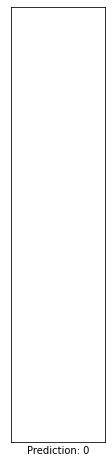

In [78]:
# En este caso nos quedamos con las clases

predictions = (model.predict(X_test) > 0.5).astype("int32") 
 
Valor_salida = np.argmax(predictions, axis=1) 
 
# Mostramos algunos digitos con las clases predichas
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(X_test), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(Valor_salida[index[i]]))
    plt.imshow(X_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

In [61]:
# make class prediction -> hacer predicción de clase
predictions = model.predict_classes(X)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

Veamos un ejemplo

In [55]:
for i in range(10):
    print('%s --> %d (real %d)' % (X[i].tolist(), predictions[i], y[i]))

NameError: name 'predictions' is not defined

Ejecutar el ejemplo no muestra la barra de progreso como antes, ya que hemos establecido el argumento `verbose` en 0. 

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>